**Introduction**
In this raw dataset, 14 variables are used to deduce whether or not a patient has heart disease from 0 (absence) and 1-4 (presence). Using the processed Cleveland dataset I will use the variables trestbps, col, and num in order to deduce and predict whether patients have heart disease, as well as what the relationship between the three variables is in contributing to the presence or absence of heart disease. 

**Methods**
I have chosen to use the "trestbps" and "col" variables to predict whether or not a patient will have heart disease (column "num"). These variables were chosen because there are possibilities of having different numbers instead of ones that can only be 0 or 1, which deems them to have equal probability regardless of the classifier and thus rendering it irrelevant. In order to do so, I will create a classification model using the K-nearest neighbors model. 

In [1]:
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
set.seed(1)
url <- "https://github.com/UBC-DSCI/dsci-100-project_template/raw/main/data/heart_disease/processed.cleveland.data"
cleveland <- read_csv(url, col_names = c("age","sex","cp","trestbps","chol","fbs","restecg",
                                         "thalach","exang","oldpeak","slope","ca","thal","num")) |>
 select(trestbps, chol, num) |>
    mutate(num = as_factor(num)) |>
     mutate(num = fct_recode(num, "presence" = "1", "presence" = "2", "presence" = "3", "presence" = "4", "absence" = "0"))

cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


trestbps,chol,num
<dbl>,<dbl>,<fct>
145,233,absence
160,286,presence
120,229,presence
130,250,absence
130,204,absence
120,236,absence
140,268,presence
120,354,absence
130,254,presence


In [3]:
cleveland_split <- initial_split(cleveland, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 227
Columns: 3
$ trestbps <dbl> 145, 130, 130, 140, 140, 150, 130, 110, 150, 120, 150, 150, 1…
$ chol     <dbl> 233, 250, 204, 192, 294, 168, 266, 211, 283, 340, 226, 247, 2…
$ num      <fct> absence, absence, absence, absence, absence, absence, absence…


 First, I have cleaned the data so that all the unknown values were filtered out, and only the three columns I'm interested in remain. Then, I split the data into training and testing sets, which I will use to predict the presence or absence of heart disease by creating a recipe and a workflow.

In [6]:
cleveland_recipe <- recipe(num ~ chol + trestbps, data = cleveland_train)
cleveland_recipe <- cleveland_recipe |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()

cleveland_scaled <- bake(cleveland_recipe, cleveland_train)
cleveland_scaled

chol,trestbps,num
<dbl>,<dbl>,<fct>
-0.2959887114,0.7045404,absence
0.0644468952,-0.1596383,absence
-0.9108494520,-0.1596383,absence
-1.1652745861,0.4164808,absence
0.9973390534,0.4164808,absence
-1.6741248542,0.9925999,absence
0.4036804073,-0.1596383,absence
-0.7624347905,-1.3118765,absence
0.7641160139,0.9925999,absence


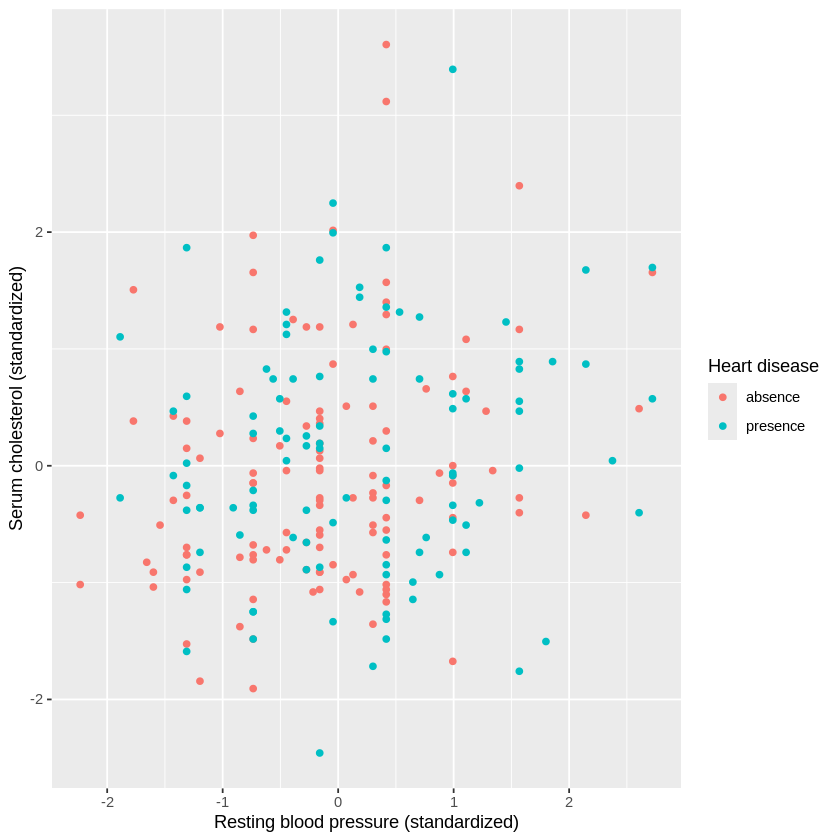

In [7]:
cleveland_plot_standardized <- cleveland_scaled |>
    ggplot(aes(x = trestbps, y = chol, color = num)) +
    geom_point() +
    labs(x = "Resting blood pressure (standardized)", y = "Serum cholesterol (standardized)", color = "Heart disease")

cleveland_plot_standardized

I will also create a graph showing whether there is a relationship between trestbps and col in contributing to heart disease.

**Expected results** 
From previous knowledge, I expect that having a higher blood pressure and cholesterol makes it more likely for a patient to have heart disease. After knowing the relationships between the blood pressure, cholesterol, and presence/absence of heart disease, the findings can be used to determine the likelihood for a patient to have the disease, and if they need to change any aspect of their lifestyle as a form of prevention. This could also lead to questions about whether environment or culture plays a role in the development of heart disease, which can be answered by looking at data from other countries, or how effective lifestyle changes are to prevention. 